In [1]:
import pandas as pd
from pathlib import Path
import unicodedata
import ast
import numpy as np
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
from nltk.corpus import stopwords

In [19]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
scraped_df = pd.read_csv("data/scraped.csv", comment="#")

In [3]:
def fix_content(x):
    
    if type(x) != type(np.nan):
      
        arr = []
        for i in ast.literal_eval(x):
            arr.append(unicodedata.normalize("NFKD", i).strip())
        return " ".join(np.asarray(arr).flatten().tolist())
scraped_df["fixed_content"] = scraped_df["main_content"].transform(fix_content)

In [4]:
scraped_df = scraped_df.dropna(subset=["fixed_content"])

In [5]:
scraped_df["sent_tokens"] = scraped_df["fixed_content"].transform(lambda x : sent_tokenize(x))

In [6]:
scraped_df["sent_tokens"][0][0]

'MAHITAHI HAUORA  We are looking for an experienced Information Systems Facilitator who is comfortable in supporting internal and external customers across a range of platforms and programs and who has a flare for identifying and implementing improvement initiatives in IT functionality and systems that will enable enhanced quality, productivity, simplicity and efficiency for our users.'

In [10]:
sent_corp = [
]

stop_words = set(stopwords.words("english"))

for i in scraped_df["sent_tokens"].values:
    for sentence in i:
        
        sent = word_tokenize(sentence)
        sent_clean = []
        for word in sent:
            if word.isalpha() and word not in stop_words:
                sent_clean.append(word.lower())
       # word.lower() for word in sent if word.isalpha() and word not in stop_words
        sent_corp.append(sent_clean)
    

In [88]:
sent = ["sloth", "we", "an", "the","it", "i"]
for word in sent:
    print(word not in stop_words)

True
False
False
False
False
False


In [12]:
sent_corp.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
def clean_corp(corp):
    for i in corp

In [33]:
len(sent)

49532

In [50]:
model = Word2Vec(sent_corp, min_count=5,size=50,workers=12, iter=20, sg = 1)

In [91]:
model["workplace"]

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.5341224 ,  0.49985832, -0.03571999, -0.20064446,  0.82368416,
        0.04411618, -0.31210986, -0.27457878, -0.4179791 , -0.2077065 ,
        0.4189295 ,  0.21620058, -0.12934338,  0.5758715 ,  0.2749631 ,
       -0.01766788, -0.7370485 , -0.6651483 ,  1.298259  ,  0.13757567,
        0.09779014,  0.49045652, -0.53968096,  0.08905211, -0.7874192 ,
       -0.22727613,  1.1210877 ,  0.39147523,  0.21361709, -0.4713037 ,
        0.26674944,  0.15029971, -0.23824917, -0.488133  ,  0.34278893,
       -0.3883541 , -0.7664061 , -0.09204368,  0.22024263,  0.28353876,
       -0.33915257, -0.2621415 , -0.16756687, -0.39368382, -0.2755056 ,
        0.41567877, -0.493251  , -0.09567542,  0.10107552, -0.20832585,
       -0.80403596,  0.4200767 ,  0.33089736,  0.50307304,  0.53410226,
       -0.2967939 ,  0.21965556,  0.00417999, -0.28654703, -0.07957685,
       -0.1798094 ,  0.01959642, -0.65810615, -0.37191343, -0.00663324,
       -0.37756404, -0.22619514, -0.35486537, -0.17721513,  0.21

In [92]:
model["employer"]

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.3489579 ,  0.36741716, -0.57234263, -0.8606643 , -0.02431424,
        0.9730563 ,  0.4283585 , -0.7923173 , -0.7245571 , -0.20828861,
       -0.02349497,  0.59793293, -0.0889912 ,  0.24834391,  0.44033748,
       -0.6360616 , -0.7347951 , -0.03486869,  0.7813875 ,  0.48382607,
        0.37947425, -0.309462  , -0.03882295,  0.01102592, -0.6437603 ,
        0.09806914,  1.0577258 ,  0.2883945 ,  0.917613  , -0.6357573 ,
        0.4003202 , -0.20799018, -0.0149365 , -0.22947924, -0.01964587,
       -0.25451562,  0.02769925,  0.22975047,  0.07100943,  0.25698978,
        0.14620839, -0.76740694, -0.410307  , -0.06821334,  0.31340113,
       -0.05940638, -0.2038397 ,  0.6629922 ,  0.16225809, -1.0090678 ,
        0.05400539, -0.16034618, -0.01172217,  0.16199237, -0.31552958,
        0.09354289,  0.29183677,  0.4814791 ,  0.24764746, -0.23019992,
        0.10823817, -0.09123109, -1.2394596 ,  0.58377826,  0.27199325,
       -0.32769793,  0.5938212 , -0.1503138 , -0.45117393,  0.71

In [7]:
import sklearn
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [98]:
np.dot(model["employer"], model["workplace"])

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


7.6716557

In [8]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

In [107]:
cosine_similarity(model["python"].reshape(1,-1), model["sql"].reshape(1,-1))

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[0.68861735]], dtype=float32)

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """
C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


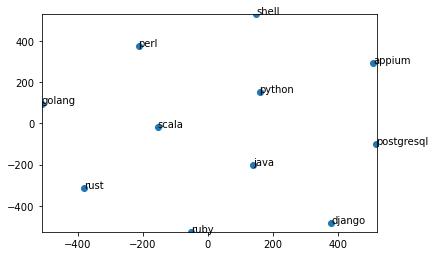

In [124]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
display_closestwords_tsnescatterplot(model, 'python', 100) 

In [51]:
model.save("models/word2vec_uni.model")

In [10]:
model = Word2Vec.load("models/word2vec_sg.model")

In [14]:
model.wv

In [68]:
from gensim.models.phrases import Phrases, Phraser
from gensim.models import phrases
from gensim.models.phrases import Phrases

ImportError: cannot import name 'ENGLISH_CONNECTOR_WORDS' from 'gensim.models.phrases' (C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\gensim\models\phrases.py)

In [67]:
phrases??

In [128]:
bigram = Phrases(sent_corp, min_count=3)

In [70]:
bigram.add_vocab(sent_corp)

In [74]:
bigrams =set(bigram.export_phrases(sent_corp))


In [75]:
bigrams

{(b'being young', 53.507148313871),
 (b'that means', 34.673691654879775),
 (b'aws google', 30.125099846390167),
 (b'borders remaining', 2042.8583333333333),
 (b'honesty integrity', 421.2983888292159),
 (b'work flexibly', 26.869450690879262),
 (b'application packaging', 19.539534512992187),
 (b'internal external', 188.1591348782437),
 (b'advertised positions', 1380.0642962962963),
 (b'investigate resolve', 107.14291958041959),
 (b'importantly fun', 41.69098639455782),
 (b'able handle', 12.266963570856685),
 (b'year indicates', 236.62451737451738),
 (b'in addition', 177.2712381311702),
 (b'agile coach', 17.879677538377056),
 (b'regular reports', 28.108124488124492),
 (b'bnz passionate', 26.177207079740516),
 (b'power automate', 68.57626407441079),
 (b'efficiently effectively', 27.668510158013547),
 (b'covered equal', 45.701528709917966),
 (b'unix scripting', 49.10717147435897),
 (b'privacy act', 260.94464813719696),
 (b'attention details', 20.392471664760322),
 (b'either dunedin', 64.341

In [18]:
for sentence in sent_corp[:10]:
    print(bigram[sentence])

['mahitahi_hauora', 'we', 'looking', 'experienced', 'information', 'systems', 'facilitator', 'comfortable', 'supporting', 'internal_external', 'customers', 'across', 'range', 'platforms', 'programs', 'flare', 'identifying', 'implementing', 'improvement', 'initiatives', 'it', 'functionality', 'systems', 'enable', 'enhanced', 'quality', 'productivity', 'simplicity', 'efficiency', 'users']
['about', 'mahitahi_hauora', 'mahitahi_hauora', 'primary', 'health', 'entity', 'te_tai', 'tokerau']
['it', 'charitable', 'social', 'enterprise', 'vision', 'everyone', 'tai_tokerau', 'equitable', 'opportunity', 'receive', 'care', 'wellbeing', 'support', 'need', 'way', 'works', 'centre', 'decisions', 'care', 'wellbeing']
['mahitahi_hauora', 'supports', 'primary', 'healthcare_providers', 'including', 'general', 'practices', 'health', 'providers', 'deliver', 'care', 'look', 'wellbeing', 'communities']
['we', 'also', 'deliver', 'care', 'wellbeing', 'support', 'directly', 'community']
['the', 'position', 'we'

In [129]:
model = Word2Vec(bigram[sent_corp], min_count=3,size=50,workers=24, iter=20, sg = 1)

In [21]:
model.add_vocab()

AttributeError: 'Word2Vec' object has no attribute 'add_vocab'

In [31]:
bigram.add_vocab(["web_developer"])

In [39]:
bigram[sent_corp[0]]

['mahitahi_hauora',
 'we',
 'looking',
 'experienced',
 'information',
 'systems',
 'facilitator',
 'comfortable',
 'supporting',
 'internal_external',
 'customers',
 'across',
 'range',
 'platforms',
 'programs',
 'flare',
 'identifying',
 'implementing',
 'improvement',
 'initiatives',
 'it',
 'functionality',
 'systems',
 'enable',
 'enhanced',
 'quality',
 'productivity',
 'simplicity',
 'efficiency',
 'users']

In [126]:
words2=[]
for flat in sent_corp:
    for i in range(len(flat)):
        word = flat[i]
        if word == "developer" or word == "developers":
            words2.append("_".join((flat[i-1], word)))
            print(flat)

['as', 'technical', 'director', 'provide', 'technical', 'leadership', 'principal', 'developers', 'solution', 'architects', 'also', 'helping', 'identify', 'development', 'opportunities', 'members', 'delivery', 'squads']
['in', 'role', 'need', 'possess', 'wide', 'range', 'skills', 'capable', 'operating', 'advisor', 'analyst', 'designer', 'developer']
['location', 'auckland', 'cbd', 'you', 'accomplished', 'junior', 'java', 'developer', 'strong', 'background', 'system', 'integration']
['reporting', 'head', 'data', 'customer', 'platforms', 'drive', 'technology', 'team', 'development', 'community', 'practice', 'across', 'multiple', 'squads', 'ensure', 'consistency', 'tools', 'practices', 'methodologies', 'across', 'developers']
['in', 'fact', 'need', 'least', 'talented', 'developers', 'meet', 'business', 'objectives', 'year', 'indicates', 'level', 'growth', 'striving']
['your', 'role', 'as', 'junior', 'software', 'developer', 'napier', 'office', 'play', 'key', 'role', 'development', 'team', 

['and', 'terms', 'spending', 'days', 'working', 'developers', 'designers', 'architects', 'development', 'workstreams', 'design', 'testing', 'deployment']
['certs', 'salesforce', 'platform', 'developer', 'javascript', 'developer', 'give', 'cred', 'need', 'also', 'happen', 'sf', 'certs', 'administrator', 'app', 'builder', 'cloud', 'springboarded', 'gruntiest', 'work']
['certs', 'salesforce', 'platform', 'developer', 'javascript', 'developer', 'give', 'cred', 'need', 'also', 'happen', 'sf', 'certs', 'administrator', 'app', 'builder', 'cloud', 'springboarded', 'gruntiest', 'work']
['and', 'terms', 'spending', 'days', 'working', 'developers', 'designers', 'architects', 'development', 'workstreams', 'design', 'testing', 'deployment']
['certs', 'salesforce', 'platform', 'developer', 'javascript', 'developer', 'give', 'cred', 'need', 'also', 'happen', 'sf', 'certs', 'administrator', 'app', 'builder', 'cloud', 'springboarded', 'gruntiest', 'work']
['certs', 'salesforce', 'platform', 'developer'

In [127]:
words2

['principal_developers',
 'designer_developer',
 'java_developer',
 'across_developers',
 'talented_developers',
 'software_developer',
 'software_developers',
 'suppliers_developers',
 'software_developer',
 'our_developers',
 'all_developers',
 'users_developers',
 'staff_developers',
 'analysts_developers',
 'leading_developer',
 'require_developers',
 'as_developer',
 'experience_developer',
 'talented_developers',
 'stakeholders_developers',
 'senior_developer',
 'represent_developers',
 'skilled_developer',
 'bas_developers',
 'collaboration_developers',
 'end_developers',
 'previous_developer',
 'grassroots_developers',
 'software_developers',
 'software_developer',
 'software_developers',
 'may_developer',
 'shape_developer',
 'handoff_developer',
 'leads_developers',
 'junior_developer',
 'talented_developers',
 'software_developer',
 'require_developers',
 'stack_developer',
 'talented_developers',
 'alongside_developers',
 'web_developer',
 'web_developer',
 'apis_developers

In [112]:
sent_corp[993]

['you',
 'experience',
 'within',
 'administration',
 'troubleshooting',
 'functions',
 'strong',
 'customer',
 'service',
 'mindset']

In [102]:
words2

['principal_developers',
 'designer_developer',
 'java_developer',
 'across_developers',
 'talented_developers',
 'software_developer',
 'software_developers',
 'suppliers_developers',
 'software_developer',
 'our_developers',
 'all_developers',
 'users_developers',
 'staff_developers',
 'analysts_developers',
 'leading_developer',
 'require_developers',
 'as_developer',
 'experience_developer',
 'talented_developers',
 'stakeholders_developers',
 'senior_developer',
 'represent_developers',
 'skilled_developer',
 'bas_developers',
 'collaboration_developers',
 'end_developers',
 'previous_developer',
 'grassroots_developers',
 'software_developers',
 'software_developer',
 'software_developers',
 'may_developer',
 'shape_developer',
 'handoff_developer',
 'leads_developers',
 'junior_developer',
 'talented_developers',
 'software_developer',
 'require_developers',
 'stack_developer',
 'talented_developers',
 'alongside_developers',
 'web_developer',
 'web_developer',
 'apis_developers

In [122]:
bi_sentcorp = []

for s in sent_corp:
    bi_sentcorp.append(bigram[s])

In [123]:
t = bi_sentcorp

In [124]:
flat  = [item for sublist in t for item in sublist]

In [125]:
words= []

for word in flat:
    if "web" in word:
        words.append(word)
    
print(set(words))



{'web_portals', 'webi', 'webeoc', 'web_apps', 'progressive_web', 'websphere', 'webmaster', 'webplatform', 'webhooks', 'web_pages', 'webapis', 'webform', 'webpages', 'amazon_web', 'websites', 'website', 'website_showcases', 'linq_web', 'webmethods', 'web_app', 'web_apis', 'website_https', 'webchat', 'restful_web', 'webload', 'web', 'responsive_web', 'check_website', 'web_applications', 'webinars', 'webjobs', 'webserver', 'visit_website', 'careers_website', 'webservices', 'web_api', 'webdriverio', 'modern_web', 'immigration_website', 'web_mobile', 'websites_web', 'webapi', 'selenium_webdriver', 'webex', 'webstore', 'webpage', 'webpack', 'websockets', 'webflow'}


In [91]:
for word in flat[:10]:
    print(word)

mahitahi_hauora
we
looking
experienced
information
systems
facilitator
comfortable
supporting
internal_external


In [88]:
words

['d',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 's',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 's',
 't',
 'a',
 'l',
 'e',
 'n',
 't',
 'e',
 'd',
 '_',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 's',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 '_',
 'n',
 'a',
 'p',
 'i',
 'e',
 'r',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 's',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 's',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 's',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 's',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 's',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 's',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 's',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'r',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o'

In [81]:
"web developer" in flat

False

In [132]:
model["web_developers"]

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'web_developers' not in vocabulary"

In [133]:
 model.similar_by_word("web_developer")

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('senior_backend', 0.7728327512741089),
 ('suit_confident', 0.7631438970565796),
 ('look_add', 0.7612411975860596),
 ('craig_parsons', 0.7452630996704102),
 ('backend_developer', 0.7414383888244629),
 ('cherrie_wheeler', 0.7330859899520874),
 ('permanent_fulltime', 0.7293616533279419),
 ('partner_airmed', 0.728400707244873),
 ('proud_exclusively', 0.7232877612113953),
 ('developer_evangelist', 0.7230342626571655)]

In [134]:
model.save("models/word2vec_bi_updated.model")

In [70]:
"_".join("asdf ffff".split(" "))

'asdf_ffff'